# Linear Systems of Equations

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Solve linear systems of equations $A \mathbf{x} = \mathbf{b}$:

* Create NumPy arrays to represent $A$ and $\mathbf{b}$
* Compute the solution $\boldsymbol{x}$ using the SciPy function `scipy.linalg.solve`

[Learn about NumPy arrays](https://www.math.ubc.ca/~pwalls/math-python/scipy/numpy/) and the [SciPy Linear Algebra package](https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/linear-algebra-scipy/).

## Example: Solve $A \mathbf{x} = \mathbf{b}$ with `scipy.linalg.solve`

Compute the solution of the system $A \mathbf{x} = \mathbf{b}$ where

$$
A = \begin{bmatrix} 2 & 1 & 1 \\ 2 & 0 & 2 \\ 4 & 3 & 4 \end{bmatrix}
\hspace{10mm}
\mathbf{b} = \left[ \begin{array}{r} -1 \\ 1 \\ 1 \end{array} \right]
$$

In [2]:
A = np.array([[2,1,1],[2,0,2],[4,3,4]])
b = np.array([[-1],[1],[1]])

In [3]:
print(A)

[[2 1 1]
 [2 0 2]
 [4 3 4]]


In [4]:
print(b)

[[-1]
 [ 1]
 [ 1]]


In [5]:
type(b)

numpy.ndarray

In [6]:
x = la.solve(A,b)

In [7]:
print(x)

[[-1.16666667]
 [-0.33333333]
 [ 1.66666667]]


Due to rounding errors in the computation, our solution $\hat{\mathbf{x}}$ is an approximation of the exact solution

$$
\mathbf{x} = \left[ \begin{array}{r} -7/6 \\-1/3 \\ 5/3 \end{array} \right]
$$

Compute the norm of the residual $\| \mathbf{b} - A \mathbf{x} \|$

In [8]:
r = la.norm(b - A @ x)

In [9]:
print(r)

2.220446049250313e-16


## Example: Resistor Network

Compute the solution of the system $A \mathbf{x} = \mathbf{b}$ for

$$
A = 
\left[
\begin{array}{cccccccc}
2R & -R & 0 & 0 & \cdots & 0 & 0 & 0 \\
-R & 2R & -R & 0 & & 0 & 0  & 0 \\
0 & -R & 2R & -R & \cdots & 0 & 0 & 0 \\
\vdots &  & \vdots &  & \ddots & & \vdots & \\
0 & 0 & 0 & 0 & \cdots & -R & 2R & -R \\
0 & 0 & 0 & 0 & \cdots & 0 & -R & 2R \\
\end{array}
\right]
\hspace{10mm}
\mathbf{b} = \left[ \begin{array}{r} V \\ \vdots \\ V \end{array} \right]
$$

where $A$ is a square matrix of size $N$, and $R$ and $V$ are some positive constants. The system is a mathematical model of the parallel circuilt

![resistor network](data/circuit.png)

such that the solution consists of the loops currents $i_1,\dots,i_N$.

In [10]:
N = 10
R = 1
V = 1
A1 = 2*R*np.eye(N)
A2 = np.diag(-R*np.ones(N-1),1)
A = A1 + A2 + A2.T
b = V*np.ones([N,1])

In [11]:
print(A)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


In [12]:
print(b)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [13]:
x = la.solve(A,b)

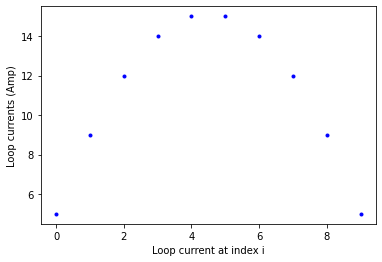

In [14]:
plt.plot(x,'b.')
plt.xlabel('Loop current at index i')
plt.ylabel('Loop currents (Amp)')
plt.show()

In [15]:
print(x)

[[ 5.]
 [ 9.]
 [12.]
 [14.]
 [15.]
 [15.]
 [14.]
 [12.]
 [ 9.]
 [ 5.]]
